# 图像分类 模型实验

In [1]:
# -*- coding:uft-8

import glob
import os
import cv2
import  tensorflow as tf
from tensorflow.keras import layers, optimizers, datasets, Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import load_model

# 数据集的地址  改为你自己的
path = './train/'
print(os.path.exists(path))

# 缩放图片大小为100*100
w = 100
h = 100
# c = 3


True


In [2]:
[path+x for x in os.listdir(path)]

['./train/images.zip',
 './train/Rice blast',
 './train/Rice fleck',
 './train/Rice koji disease',
 './train/Sheath blight']

In [3]:
# 定义函数read_img，用于读取图像数据，并且对图像进行resize格式统一处理
def read_img(path): 
    # 创建层级列表cate，用于对数据存放目录下面的数据文件夹进行遍历，os.path.isdir用于判断文件是否是目录，然后对是目录文件的文件进行遍历
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]  
     # 创建保存图像的空列表
    imgs=[]   
    # 创建用于保存图像标签的空列表
    labels=[]    
    # enumerate函数用于将一个可遍历的数据对象组合为一个索引序列，同时列出数据和下标,一般用在for循环当中
    # enumerate(cate) -> (0, './flower_photos/daisy') 索引+路径
    for idx,folder in enumerate(cate):    
        # 利用glob.glob函数搜索每个层级文件下面符合特定格式“/*.jpg”进行遍历 匹配
        for im in glob.glob(folder+'/*.jpg'): 
            #opencv读取图片，仅仅是读一下
            # 利用imread函数读取每一张被遍历的图像
        
            img=cv2.imread(im)  
            #处理空文件 ---由于数据集过大，可能会有数据存在问题，这里就要把问题数据筛选出来 https://www.cnblogs.com/1-0001/p/12886001.html
            if img is None:
                print(im)
                continue
            # 利用resize函数对每张img图像进行大小缩放，统一处理为大小为w*h(即100*100)的图像
#             print("插入的数据：",im)
            img=cv2.resize(img,(w,h))
            # 将每张经过处理的图像数据保存在之前创建的imgs空列表当中，最终所有的图片都塞到了imgs列表中
            imgs.append(img)  
            # 将每张经过处理的图像的标签数据保存在之前创建的labels列表当中 ---这里的标签仅仅是index 0123标号
            labels.append(idx) 
     # 利用np.asarray函数对生成的imgs和labels列表数据进行转化，之后转化成数组数据（imgs转成浮点数型，labels转成整数型）        
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)    

In [4]:
data,label=read_img(path)                                              # 将read_img函数处理之后的数据定义为样本数据data和标签数据label
print("shape of data:",data.shape)                                     # 查看样本数据的大小 
print("shape of label:",label.shape)                                   # 查看标签数据的大小 
# print(type(data))

shape of data: (7325, 100, 100, 3)
shape of label: (7325,)


In [5]:
data

array([[[[ 53., 123., 123.],
         [ 17.,  83.,  52.],
         [ 25.,  79.,  57.],
         ...,
         [ 70., 126., 134.],
         [ 80., 161., 163.],
         [ 99., 199., 194.]],

        [[ 31., 101., 114.],
         [ 26.,  94.,  73.],
         [ 17.,  77.,  45.],
         ...,
         [ 94., 181., 181.],
         [ 85., 198., 186.],
         [ 51., 176., 156.]],

        [[ 71., 146., 163.],
         [ 70., 138., 133.],
         [ 17.,  81.,  48.],
         ...,
         [ 79., 193., 180.],
         [ 39., 160., 137.],
         [  5., 108.,  76.]],

        ...,

        [[ 55., 129.,  77.],
         [ 55., 127.,  81.],
         [ 70., 144.,  99.],
         ...,
         [ 17.,   3.,   4.],
         [ 10.,  34.,  42.],
         [ 92., 124., 126.]],

        [[ 55., 131.,  85.],
         [ 73., 147., 104.],
         [ 63., 138.,  95.],
         ...,
         [ 12.,   0.,   2.],
         [  6.,   2.,   8.],
         [ 40.,  88.,  92.]],

        [[ 70., 146., 104.],
       

In [6]:
# 保证生成的随机数具有可预测性,即相同的种子（seed值）所产生的随机数是相同的
seed = 785
np.random.seed(seed)

#切分数据集
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size=0.33, random_state=42)
# 对数据作 标准化处理 
x_train = x_train / 255 
x_val = x_val / 255


In [3]:
#创建图像标签列表
flower_dict = {0:'Rice blast',1:'Rice fleck',2:'Rice koji disease',3:'Sheath blight'}

In [8]:
# #显示训练集的前25个元素,并在每个图像下方显示类名称
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i], cmap=plt.cm.binary)
#     plt.xlabel(flower_dict[y_train[i]])
# plt.show()


In [9]:
?layers.Conv2D

In [10]:
#参考模型 https://blog.csdn.net/Einstellung/article/details/82773170
#创建模型。模型包括3个卷积层和三个RELU激活函数，两个池化层
model = Sequential([ 
    #调用layer.Con2D()创建了一个卷积层。32表示kernel的数量。padding=“same”表示填充输入以使输出具有与原始输入相同的长度，使用RELU函数
    layers.Conv2D(32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu),
    
    #调用layers.MaxPool2D()创建最大池化层，步长为2，padding=“same”表示填充输入以使输出具有与原始输入相同的长度。
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
    #利用dropout随机丢弃25%的神经元
#     layers.Dropout(0.35),

    #继续添加两个卷积层和一个最大池化层
    layers.Conv2D(64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
    layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
#     layers.Dropout(0.35),

    # 继续添加两个卷积层和一个最大池化层
    layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
#     #利用dropout随机丢弃25%的神经元
#     layers.Dropout(0.35),
    
    #Flatten层用来将输入“压平”，即把多维的输入一维化
    layers.Flatten(),
#     layers.Dropout(0.5),
    
    #调用layers.Dense()创建全连接层
    layers.Dense(1024, activation=tf.nn.relu),
    layers.Dense(512, activation=tf.nn.relu),
    
    #添加全连接层，最后输出每个分类（5）的数值
    layers.Dense(4, activation='softmax') #二分类任务
    ])

In [11]:
# model.summary()
#使用Adam优化器，优化模型参数。lr(learning rate, 学习率)
opt = optimizers.Adam(learning_rate=0.0001)
#编译模型以供训练。metrics=['accuracy']即评估模型在训练和测试时的性能的指标。
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

In [15]:
#训练模型，决定训练集和验证集，batch size：进行梯度下降时每个batch包含的样本数。
#verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val),batch_size=200, verbose=2)
#输出模型的结构和参数量
model.summary()

Epoch 1/25
25/25 - 42s - loss: 0.2213 - accuracy: 0.9254 - val_loss: 0.3371 - val_accuracy: 0.8780
Epoch 2/25
25/25 - 41s - loss: 0.1821 - accuracy: 0.9411 - val_loss: 0.3128 - val_accuracy: 0.8797
Epoch 3/25
25/25 - 41s - loss: 0.1495 - accuracy: 0.9580 - val_loss: 0.3568 - val_accuracy: 0.8685
Epoch 4/25
25/25 - 42s - loss: 0.1691 - accuracy: 0.9442 - val_loss: 0.2775 - val_accuracy: 0.8978
Epoch 5/25
25/25 - 42s - loss: 0.1332 - accuracy: 0.9615 - val_loss: 0.2681 - val_accuracy: 0.9016
Epoch 6/25
25/25 - 43s - loss: 0.1081 - accuracy: 0.9713 - val_loss: 0.2793 - val_accuracy: 0.8904
Epoch 7/25
25/25 - 41s - loss: 0.1026 - accuracy: 0.9700 - val_loss: 0.2933 - val_accuracy: 0.8888
Epoch 8/25
25/25 - 41s - loss: 0.1094 - accuracy: 0.9676 - val_loss: 0.2724 - val_accuracy: 0.8995
Epoch 9/25
25/25 - 41s - loss: 0.0951 - accuracy: 0.9733 - val_loss: 0.2344 - val_accuracy: 0.9132
Epoch 10/25
25/25 - 42s - loss: 0.0844 - accuracy: 0.9766 - val_loss: 0.2535 - val_accuracy: 0.9098
Epoch 11/

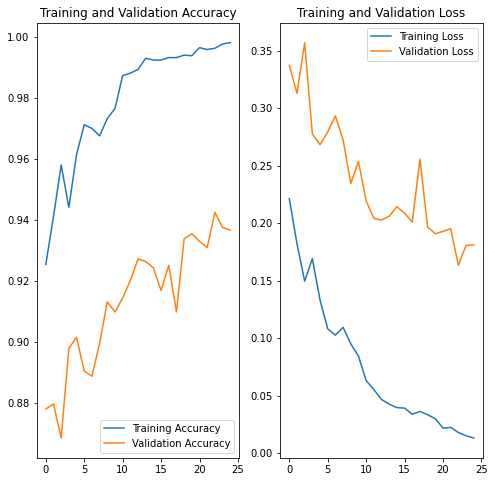

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


15代：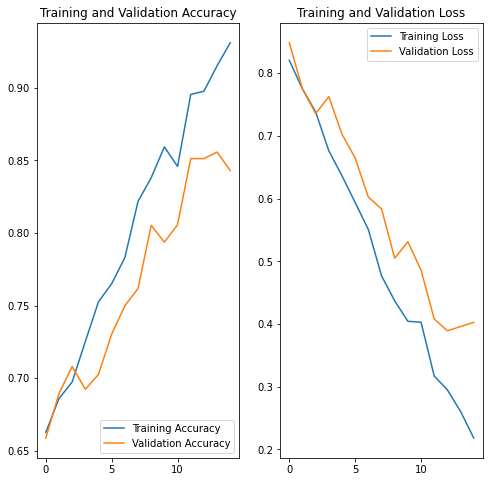
25代：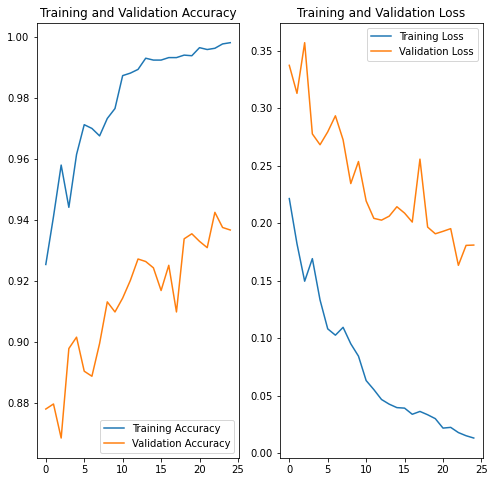

### 预测

In [6]:
model = load_model("./Model/rice_0.93.h5")

In [81]:
# 测试图像的地址 （改为自己的）
path_test = './test/'
test_list=[]
# for i in range(47):
# #     print(path_test+'/'+str(i)+'.jpg')
#     test_list.append(glob.glob(path_test+'/test'+str(i)+'.jpg'))
test_list=glob.glob(path_test+'/*.jpg')
# print(test_list[1])
# 创建保存图像的空列表
imgs=[]                                                  # glob.glob(path_test+'/*.jpg')                                            
# list_mm = glob.glob(path_test+'/*.jpg')
# print(list_mm)
for im in glob.glob(path_test+'/*.jpg'):                # 利用glob.glob函数搜索每个层级文件下面符合特定格式“/*.jpg”进行遍历
    print(im)
    img=cv2.imread(im) 
    img=cv2.resize(img,(w,h))                           
    imgs.append(img)                                     # 将每张经过处理的图像数据保存在之前创建的imgs空列表当中
imgs = np.asarray(imgs,np.float32)

print("shape of data:",imgs.shape) 

./test\test1.jpg
./test\test10.jpg
./test\test11.jpg
./test\test12.jpg
./test\test13.jpg
./test\test14.jpg
./test\test15.jpg
./test\test16.jpg
./test\test17.jpg
./test\test18.jpg
./test\test19.jpg
./test\test2.jpg
./test\test20.jpg
./test\test21.jpg
./test\test22.jpg
./test\test23.jpg
./test\test24.jpg
./test\test25.jpg
./test\test26.jpg
./test\test27.jpg
./test\test28.jpg
./test\test29.jpg
./test\test3.jpg
./test\test30.jpg
./test\test31.jpg
./test\test32.jpg
./test\test33.jpg
./test\test34.jpg
./test\test35.jpg
./test\test36.jpg
./test\test37.jpg
./test\test38.jpg
./test\test39.jpg
./test\test4.jpg
./test\test40.jpg
./test\test41.jpg
./test\test42.jpg
./test\test43.jpg
./test\test44.jpg
./test\test45.jpg
./test\test46.jpg
./test\test47.jpg
./test\test5.jpg
./test\test6.jpg
./test\test7.jpg
./test\test8.jpg
./test\test9.jpg
shape of data: (47, 100, 100, 3)


[2 2 0 2 0 0 0 1 1 2 0 2 0 0 1 1 1 0 1 3 1 1 2 1 1 3 1 1 1 3 2 2 3 2 3 3 0
 3 3 2 3 3 2 2 2 1 2]


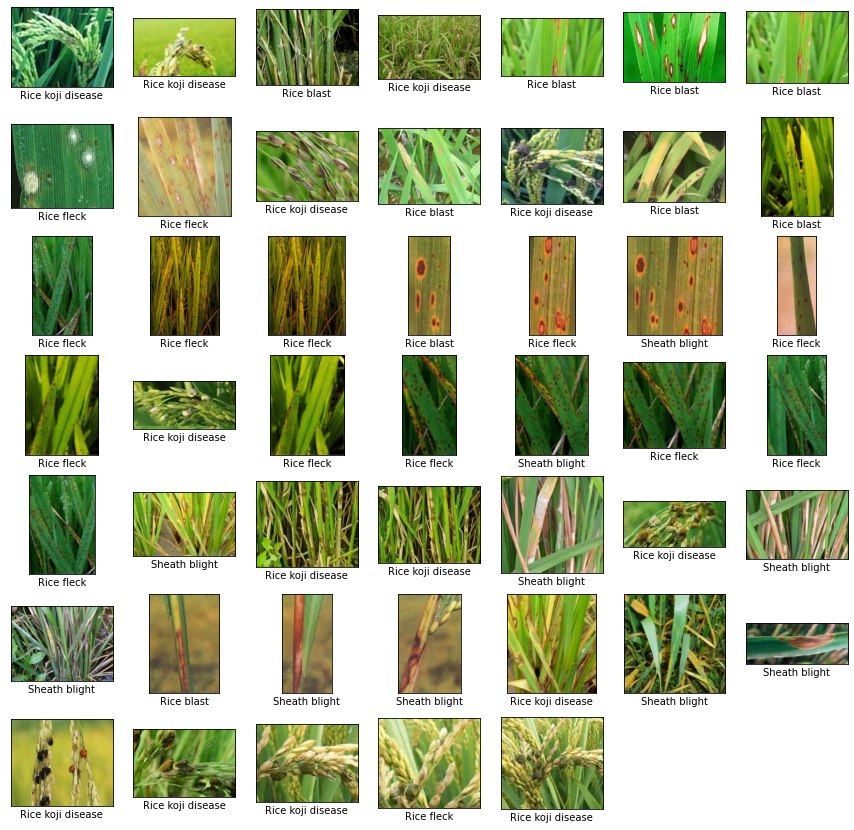

In [83]:
#将图像导入模型进行预测
# prediction = model.predict_classes(imgs)
prediction = np.argmax(model.predict(imgs), axis=-1)
# print(100*np.max(prediction[1]))
print(prediction)


#绘制预测图像
plt.figure(figsize=(15,15))
for i in range(np.size(prediction)):
    #打印每张图像的预测结果
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
#     print("第",i+1,"个预测:"+flower_dict[prediction[i]])
#     print(test_list[1])
    img = plt.imread(test_list[i])
    plt.grid(False)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.xlabel(flower_dict[prediction[i]])
plt.show() 

In [24]:
#保存模型
model.save('./Model/rice_0.93.h5')


In [5]:
#TensorFlow2.0保存为pb模型
# 保存模型结构和参数到文件
tf.keras.models.save_model(model,"./Model/rice_0.93_2.0.pb") # 默认生成 .pb 格式模型，也可以通过save_format 设置 .h5 格式
print('模型已保存')

INFO:tensorflow:Assets written to: ./Model/rice_0.93_2.0.pb\assets
模型已保存


In [89]:
#Tensoflow1.0操作
# 参考博客https://blog.csdn.net/qq_37116150/article/details/105736728
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
 
def convert_h5to_pb():
    model = tf.keras.models.load_model("./Model/rice_0.93.h5",compile=False)
    model.summary()
    full_model = tf.function(lambda Input: model(Input))
    full_model = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
 
    # Get frozen ConcreteFunction
    frozen_func = convert_variables_to_constants_v2(full_model)
    frozen_func.graph.as_graph_def()
 
    layers = [op.name for op in frozen_func.graph.get_operations()]
    print("-" * 50)
    print("Frozen model layers: ")
    for layer in layers:
        print(layer)
 
    print("-" * 50)
    print("Frozen model inputs: ")
    print(frozen_func.inputs)
    print("Frozen model outputs: ")
    print(frozen_func.outputs)
 
    # Save frozen graph from frozen ConcreteFunction to hard drive
    tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./Model",
                      name="my_fin.pb",
                      as_text=False)


In [90]:
convert_h5to_pb()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [93]:
def wrap_frozen_graph(graph_def, inputs, outputs, print_graph=False):
    def _imports_graph_def():
        tf.compat.v1.import_graph_def(graph_def, name="")
 
    wrapped_import = tf.compat.v1.wrap_function(_imports_graph_def, [])
    import_graph = wrapped_import.graph
 
    print("-" * 50)
    print("Frozen model layers: ")
    layers = [op.name for op in import_graph.get_operations()]
    if print_graph == True:
        for layer in layers:
            print(layer)
    print("-" * 50)
 
    return wrapped_import.prune(
        tf.nest.map_structure(import_graph.as_graph_element, inputs),
        tf.nest.map_structure(import_graph.as_graph_element, outputs))
 
 
def main():
    # 测试数据集，
    (train_images, train_labels), (test_list,
                                   flower_dict) = tf.keras.datasets.mnist.load_data()
 
    # Load frozen graph using TensorFlow 1.x functions
    with tf.io.gfile.GFile("./Model/my_fin.pb", "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        loaded = graph_def.ParseFromString(f.read())
 
    # Wrap frozen graph to ConcreteFunctions
    frozen_func = wrap_frozen_graph(graph_def=graph_def,
                                    inputs=["Input:0"],
                                    outputs=["Identity:0"],
                                    print_graph=True)
 
    print("-" * 50)
    print("Frozen model inputs: ")
    print(frozen_func.inputs)
    print("Frozen model outputs: ")
    print(frozen_func.outputs)
 
    # Get predictions for test images
    predictions = frozen_func(Input=tf.constant(test_list))[0]
 
    # Print the prediction for the first image
    print("-" * 50)
    print("Example prediction reference:")
    print(predictions[0].numpy())
 
 
if __name__ == "__main__":
 
    main()

--------------------------------------------------
Frozen model layers: 
Input
sequential/conv2d/Conv2D/ReadVariableOp/resource
sequential/conv2d/Conv2D/ReadVariableOp
sequential/conv2d/Conv2D
sequential/conv2d/BiasAdd/ReadVariableOp/resource
sequential/conv2d/BiasAdd/ReadVariableOp
sequential/conv2d/BiasAdd
sequential/conv2d/Relu
sequential/max_pooling2d/MaxPool
sequential/conv2d_1/Conv2D/ReadVariableOp/resource
sequential/conv2d_1/Conv2D/ReadVariableOp
sequential/conv2d_1/Conv2D
sequential/conv2d_1/BiasAdd/ReadVariableOp/resource
sequential/conv2d_1/BiasAdd/ReadVariableOp
sequential/conv2d_1/BiasAdd
sequential/conv2d_1/Relu
sequential/max_pooling2d_1/MaxPool
sequential/conv2d_2/Conv2D/ReadVariableOp/resource
sequential/conv2d_2/Conv2D/ReadVariableOp
sequential/conv2d_2/Conv2D
sequential/conv2d_2/BiasAdd/ReadVariableOp/resource
sequential/conv2d_2/BiasAdd/ReadVariableOp
sequential/conv2d_2/BiasAdd
sequential/conv2d_2/Relu
sequential/max_pooling2d_2/MaxPool
sequential/conv2d_3/Conv2D/R

InvalidArgumentError: cannot compute __inference_pruned_9713 as input #0(zero-based) was expected to be a float tensor but is a uint8 tensor [Op:__inference_pruned_9713]

In [94]:
import tensorflow as tf
tf.__version__

'2.5.0'